In [1]:
 !pip install graphviz

### Importing the packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Importing the data sets

In [5]:
data = pd.read_csv(r"D:\Data Mining\Data sets for lab report\Traffic prediction\dataset_traffic_accident_prediction1.csv")

### Reading the columns from dataset

In [7]:
data.columns


Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')

In [8]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


Weather   Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
0   Rainy   City Road     Morning              1.0        100.0   
1   Clear  Rural Road       Night              NaN        120.0   
2   Rainy     Highway     Evening              1.0         60.0   
3   Clear   City Road   Afternoon              2.0         60.0   
4   Rainy     Highway     Morning              1.0        195.0   

   Number_of_Vehicles  Driver_Alcohol Accident_Severity      Road_Condition  \
0                 5.0             0.0               NaN                 Wet   
1                 3.0             0.0          Moderate                 Wet   
2                 4.0             0.0               Low                 Icy   
3                 3.0             0.0               Low  Under Construction   
4                11.0             0.0               Low                 Dry   

  Vehicle_Type  Driver_Age  Driver_Experience Road_Light_Condition  Accident  
0          Car        51.0               48.0     Artificial Light       0.0  
1        Truck        49.0               43.0     Artificial Light       0.0  
2          Car        54.0               52.0     Artificial Light       0.0  
3          Bus        34.0               31.0             Daylight       0.0  
4          Car        62.0               55.0     Artificial Light       1.0

### Checking for null values in the dataset

In [10]:
data.isna().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

### filling the null values

In [12]:
data['Weather'].fillna(data['Weather'].mode()[0], inplace=True)  # As weather is  categorical

In [13]:
data['Road_Type'].fillna(data['Road_Type'].mode()[0], inplace=True)

In [14]:
data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0], inplace=True)

In [15]:
data['Traffic_Density'].fillna(data['Traffic_Density'].median(), inplace=True)

In [16]:
data['Speed_Limit'].fillna(data['Speed_Limit'].median(), inplace=True)

In [17]:
data['Number_of_Vehicles'].fillna(data['Number_of_Vehicles'].median(), inplace=True)

In [18]:
data['Driver_Alcohol'].fillna(data['Driver_Alcohol'].mode()[0], inplace=True)

In [19]:
data['Accident_Severity'].fillna(data['Accident_Severity'].mode()[0], inplace=True)

In [20]:
data['Road_Condition'].fillna(data['Road_Condition'].mode()[0], inplace=True)
data['Vehicle_Type'].fillna(data['Vehicle_Type'].mode()[0], inplace=True)
data['Driver_Age'].fillna(data['Driver_Age'].median(), inplace=True)
data['Driver_Experience'].fillna(data['Driver_Experience'].median(), inplace=True)
data['Road_Light_Condition'].fillna(data['Road_Light_Condition'].mode()[0], inplace=True)
data['Accident'].fillna(data['Accident'].mode()[0], inplace=True)

In [21]:
data.isna().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

### Checking for duplicate data

In [23]:
data.duplicated().sum()

18

### Removing the duplicate data

In [25]:
df = data.copy()
df.drop_duplicates(inplace=True)

In [26]:
df.duplicated().sum()

0

In [27]:
# Assign data types to columns
data_clean = df.astype({
    'Weather': 'category',            
    'Road_Type': 'category',
    'Time_of_Day': 'category',
    'Traffic_Density': 'int64',        
    'Speed_Limit': 'int64',             
    'Number_of_Vehicles': 'int64',
    'Driver_Alcohol': 'category',      
    'Accident_Severity': 'category',   
    'Road_Condition': 'category',
    'Vehicle_Type': 'category',
    'Driver_Age': 'int64',
    'Driver_Experience': 'int64', 
    'Road_Light_Condition': 'category',
    'Accident': 'category' 
})

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               840 non-null    object 
 1   Road_Type             840 non-null    object 
 2   Time_of_Day           840 non-null    object 
 3   Traffic_Density       840 non-null    float64
 4   Speed_Limit           840 non-null    float64
 5   Number_of_Vehicles    840 non-null    float64
 6   Driver_Alcohol        840 non-null    float64
 7   Accident_Severity     840 non-null    object 
 8   Road_Condition        840 non-null    object 
 9   Vehicle_Type          840 non-null    object 
 10  Driver_Age            840 non-null    float64
 11  Driver_Experience     840 non-null    float64
 12  Road_Light_Condition  840 non-null    object 
 13  Accident              840 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 822 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               822 non-null    object 
 1   Road_Type             822 non-null    object 
 2   Time_of_Day           822 non-null    object 
 3   Traffic_Density       822 non-null    float64
 4   Speed_Limit           822 non-null    float64
 5   Number_of_Vehicles    822 non-null    float64
 6   Driver_Alcohol        822 non-null    float64
 7   Accident_Severity     822 non-null    object 
 8   Road_Condition        822 non-null    object 
 9   Vehicle_Type          822 non-null    object 
 10  Driver_Age            822 non-null    float64
 11  Driver_Experience     822 non-null    float64
 12  Road_Light_Condition  822 non-null    object 
 13  Accident              822 non-null    float64
dtypes: float64(7), object(7)
memory usage: 96.3+ KB


In [30]:
def find_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    condition = (df[col] < lower_bound) | (df[col] > upper_bound)
    outliers = df[condition]
    
    return outliers

In [31]:
age_outliers = find_outliers(data_clean, 'Traffic_Density')
age_outliers

Empty DataFrame
Columns: [Weather, Road_Type, Time_of_Day, Traffic_Density, Speed_Limit, Number_of_Vehicles, Driver_Alcohol, Accident_Severity, Road_Condition, Vehicle_Type, Driver_Age, Driver_Experience, Road_Light_Condition, Accident]
Index: []

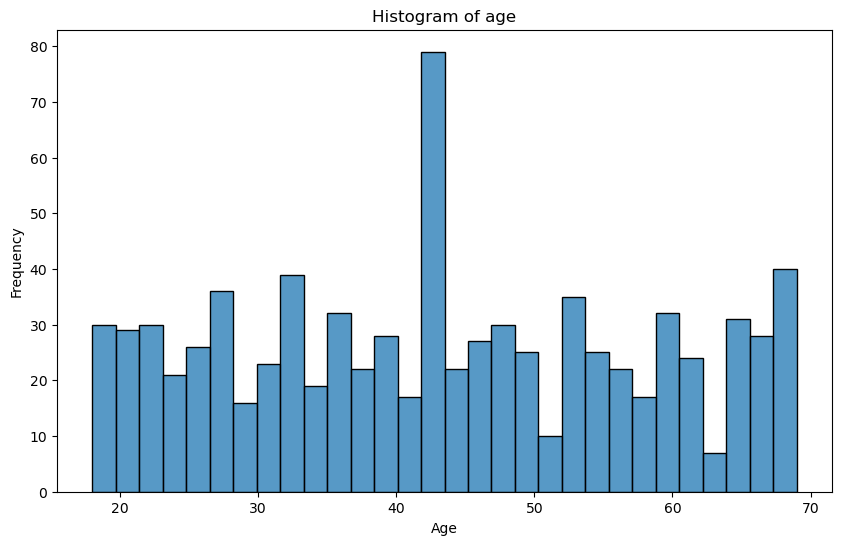

In [32]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Driver_Age'], bins=30)
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

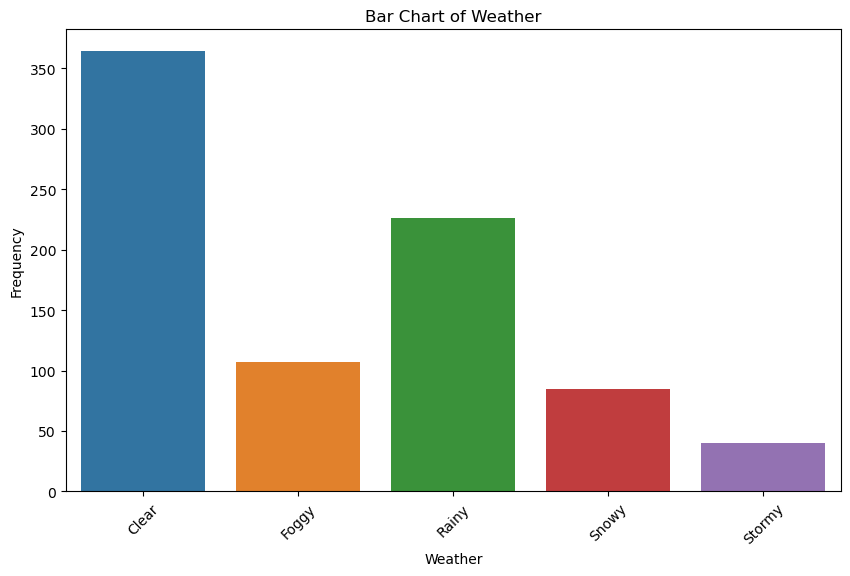

In [33]:
# Bar plot for 
plt.figure(figsize=(10, 6))
sns.countplot(x=data_clean['Weather'])
plt.title('Bar Chart of Weather')
plt.xlabel('Weather')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

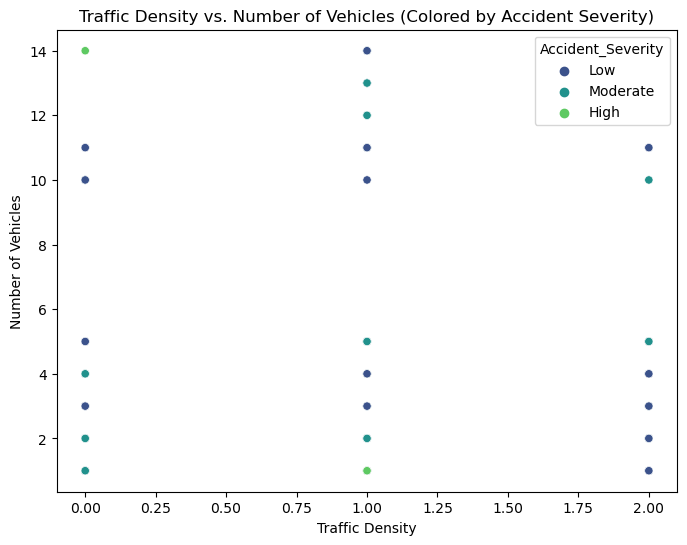

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Traffic_Density', y='Number_of_Vehicles', data=df, hue='Accident_Severity', palette='viridis')
plt.title('Traffic Density vs. Number of Vehicles (Colored by Accident Severity)')
plt.xlabel('Traffic Density')
plt.ylabel('Number of Vehicles')
plt.show()

In [35]:
df['Traffic_Density'].value_counts()

Traffic_Density
1.0    343
2.0    240
0.0    239
Name: count, dtype: int64

In [36]:
categorical_cols = data_clean.describe(include='category').columns
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_cols:
    df[column + '_Encoded'] = label_encoder.fit_transform(df[column])

In [37]:
df.head()

Weather   Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
0   Rainy   City Road     Morning              1.0        100.0   
1   Clear  Rural Road       Night              1.0        120.0   
2   Rainy     Highway     Evening              1.0         60.0   
3   Clear   City Road   Afternoon              2.0         60.0   
4   Rainy     Highway     Morning              1.0        195.0   

   Number_of_Vehicles  Driver_Alcohol Accident_Severity      Road_Condition  \
0                 5.0             0.0               Low                 Wet   
1                 3.0             0.0          Moderate                 Wet   
2                 4.0             0.0               Low                 Icy   
3                 3.0             0.0               Low  Under Construction   
4                11.0             0.0               Low                 Dry   

  Vehicle_Type  ...  Accident  Weather_Encoded Road_Type_Encoded  \
0          Car  ...       0.0                2                 0   
1        Truck  ...       0.0                0                 3   
2          Car  ...       0.0                2                 1   
3          Bus  ...       0.0                0                 0   
4          Car  ...       1.0                2                 1   

   Time_of_Day_Encoded  Driver_Alcohol_Encoded  Accident_Severity_Encoded  \
0                    2                       0                          1   
1                    3                       0                          2   
2                    1                       0                          1   
3                    0                       0                          1   
4                    2                       0                          1   

   Road_Condition_Encoded  Vehicle_Type_Encoded  Road_Light_Condition_Encoded  \
0                       3                     1                             0   
1                       3                     3                             0   
2                       1                     1                             0   
3                       2                     0                             1   
4                       0                     1                             0   

   Accident_Encoded  
0                 0  
1                 0  
2                 0  
3                 0  
4                 1  

[5 rows x 23 columns]

In [38]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
d = df.copy()
print("Before Normalized DataFrame:")
print(d['Traffic_Density'].describe())


# Select numerical columns (excluding encoded categorical columns)
numerical_columns = d.select_dtypes(include=['int64', 'float64']).columns

# Normalize using MinMaxScaler (scales values to a range of 0 to 1)
scaler = MinMaxScaler()
d[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print("After Normalized DataFrame:")
print(d['Traffic_Density'].describe())

# Display the normalized DataFrame
print("Normalized DataFrame:")
print(d.head())

Before Normalized DataFrame:
count    822.000000
mean       1.001217
std        0.763828
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Traffic_Density, dtype: float64
After Normalized DataFrame:
count    822.000000
mean       0.500608
std        0.381914
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Traffic_Density, dtype: float64
Normalized DataFrame:
  Weather   Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
0   Rainy   City Road     Morning              0.5     0.382514   
1   Clear  Rural Road       Night              0.5     0.491803   
2   Rainy     Highway     Evening              0.5     0.163934   
3   Clear   City Road   Afternoon              1.0     0.163934   
4   Rainy     Highway     Morning              0.5     0.901639   

   Number_of_Vehicles  Driver_Alcohol Accident_Severity      Road_Condition  \
0            0.307692             0.0      

In [39]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = d.drop(columns=['Accident_Severity'])  # Features (all columns except target)
y = d['Accident_Severity']  # Target variable

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Display the split datasets
print("Train set:",X_train.shape,y_train.shape)
print("\nTest set:",X_test.shape,y_test.shape)


Train set: (575, 22) (575,)

Test set: (247, 22) (247,)


In [40]:
categorical_cols = data_clean.describe(include='category').columns
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [42]:
from sklearn.ensemble import RandomForestClassifier
# Exclude encoded columns from the feature set
# Initialize an empty list to store encoded columns
encoded_columns = []

# Loop through all columns and select encoded columns
for column in df.columns:
    if '_Encoded' in column:  # Check if the column name contains '_Encoded'
        encoded_columns.append(column)
        
X = df.drop(columns=['Accident_Severity']+encoded_columns)
y = df['Accident_Severity']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances (Excluding Encoded Columns):")
print(importance_df)

Feature Importances (Excluding Encoded Columns):
                 Feature  Importance
10     Driver_Experience    0.169691
9             Driver_Age    0.154228
4            Speed_Limit    0.095486
5     Number_of_Vehicles    0.090776
0                Weather    0.082625
2            Time_of_Day    0.068173
7         Road_Condition    0.060050
1              Road_Type    0.059348
3        Traffic_Density    0.058404
8           Vehicle_Type    0.053276
11  Road_Light_Condition    0.051793
12              Accident    0.030099
6         Driver_Alcohol    0.026050


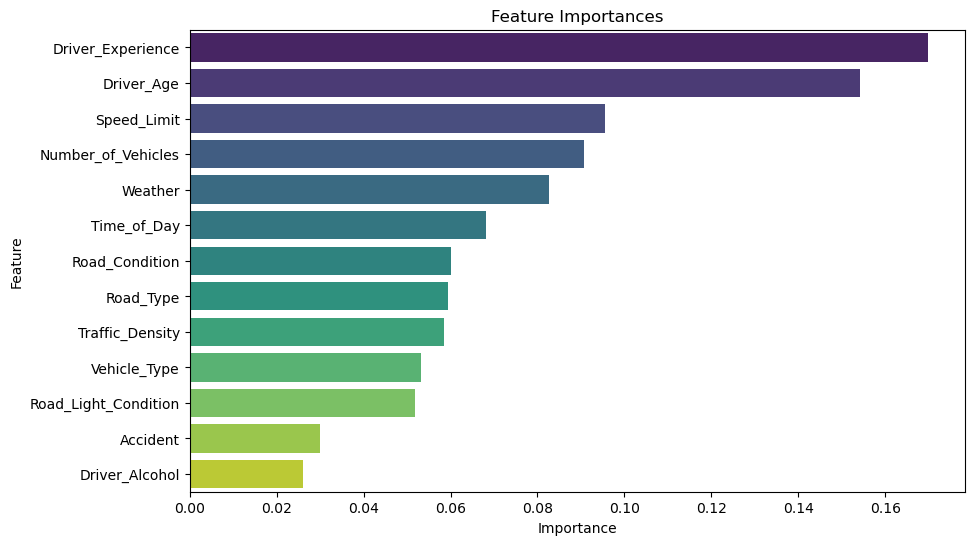

In [44]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Decision Tree

In [46]:
# Initialize the Decision Tree Classifier with entropy
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [48]:
y_pred = model.predict(X_test)

In [50]:
feature_names = X.columns.tolist()

In [52]:
class_names = data['Accident_Severity'].unique().tolist()

In [54]:
class_names

['Low', 'Moderate', 'High']

[Text(0.4519064198369565, 0.9772727272727273, 'x[10] <= 15.5\nentropy = 1.3\nsamples = 657\nvalue = [68, 395, 194]'),
 Text(0.07468944099378882, 0.9318181818181818, 'x[8] <= 2.0\nentropy = 1.041\nsamples = 36\nvalue = [6, 27, 3]'),
 Text(0.06102484472049689, 0.8863636363636364, 'x[4] <= 70.0\nentropy = 0.904\nsamples = 31\nvalue = [6, 24, 1]'),
 Text(0.05605590062111801, 0.8409090909090909, 'x[10] <= 13.5\nentropy = 1.091\nsamples = 22\nvalue = [6, 15, 1]'),
 Text(0.04363354037267081, 0.7954545454545454, 'x[3] <= 1.5\nentropy = 0.773\nsamples = 13\nvalue = [1, 11, 1]'),
 Text(0.03369565217391304, 0.75, 'x[5] <= 3.5\nentropy = 0.439\nsamples = 11\nvalue = [1, 10, 0]'),
 Text(0.02872670807453416, 0.7045454545454546, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.038664596273291926, 0.7045454545454546, 'x[5] <= 4.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.03369565217391304, 0.6590909090909091, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.0436335403

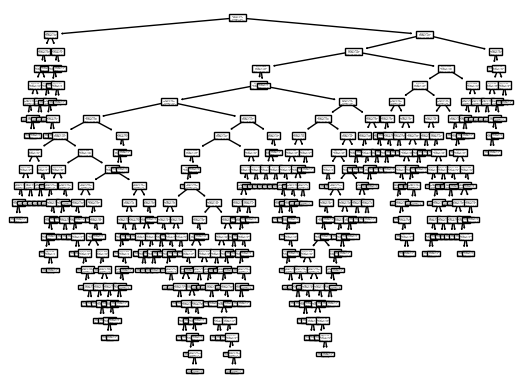

In [56]:
tree.plot_tree(model)

In [68]:
# Check the number of features
print(f"Number of features: {X.shape[1]}")

# Ensure feature_names matches the number of features
feature_names = [f'x[{i}]' for i in range(X.shape[1])]
print(f"Feature Names: {feature_names}")

Number of features: 13
Feature Names: ['x[0]', 'x[1]', 'x[2]', 'x[3]', 'x[4]', 'x[5]', 'x[6]', 'x[7]', 'x[8]', 'x[9]', 'x[10]', 'x[11]', 'x[12]']


In [70]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (822, 13)
Shape of y: (822,)


In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [78]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.20      0.11        10
           1       0.71      0.58      0.64       112
           2       0.33      0.35      0.34        43

    accuracy                           0.50       165
   macro avg       0.37      0.38      0.36       165
weighted avg       0.57      0.50      0.53       165


Confusion Matrix:
[[ 2  5  3]
 [19 65 28]
 [ 6 22 15]]


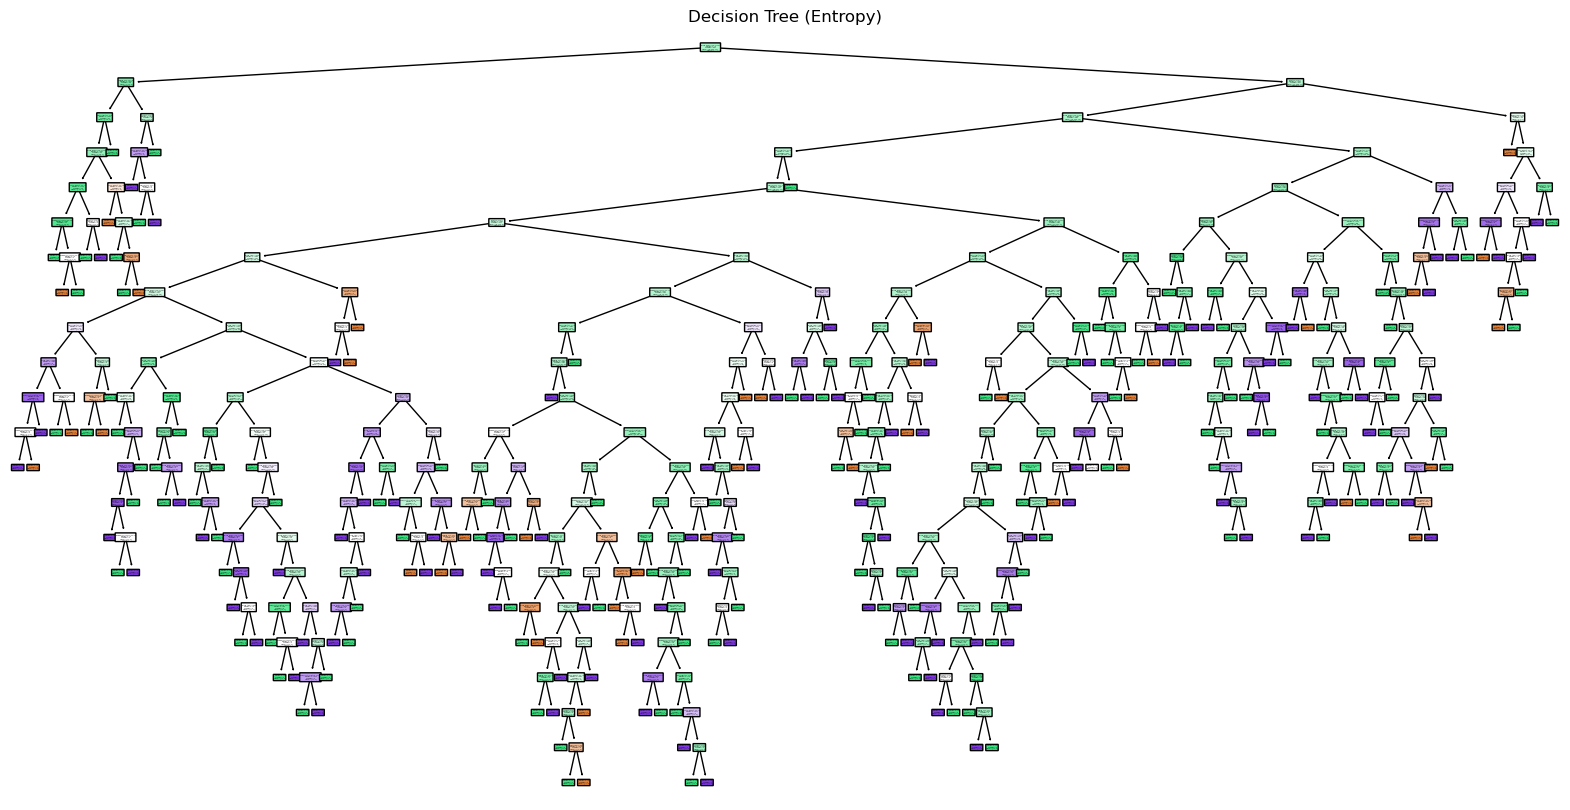

In [72]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['1', '2', '3'], filled=True, rounded=True)
plt.title("Decision Tree (Entropy)")
plt.show()

In [57]:
dot_data = tree.export_graphviz(model, 
                                out_file=None, 
                                feature_names=feature_names,  # Add this line
                                filled=True,  # Color nodes by class
                                rounded=True,  # Round node corners
                                special_characters=True)  

In [58]:
import graphviz
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [59]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH